This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [93]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = True
fit_type = 1

Define a user funcion for fitting the data.

In [94]:
if fit_type == 1:
    def fitfunction(x,a,b):
        return a*np.exp(b*np.array(x))
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

Define python arrays to store the data.

In [95]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [96]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [97]:

if use_errors == True:
    # create a list to hold the uncertainty in the gravity  
    gravity_uncertainty = [0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001]
else:
    gravity_uncertainty = [0.0]*len(gravity)
    
gravity_uncertainty = np.array(gravity_uncertainty)

Text(0, 0.5, 'Gravity (m/s^2)')

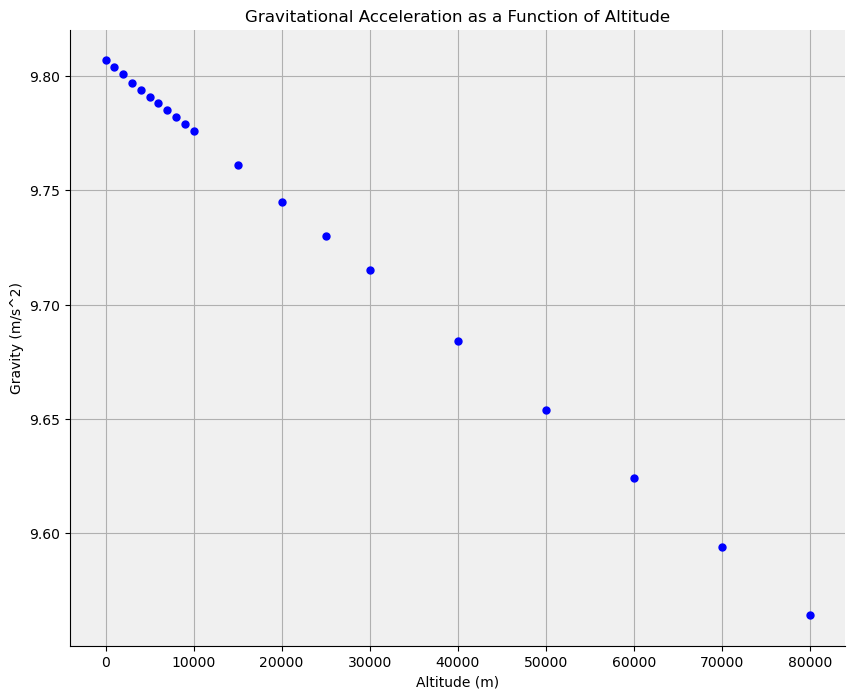

In [98]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravitational Acceleration as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")

Fit the data with the pre-defined function

In [99]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [12.0,-0.0001]
else:
    init_vals = [12.0,-0.0001, -0.000001]

if not use_errors:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[ 9.80661109e+00 -3.13369232e-07]
[[ 9.31855003e-08 -1.97943477e-13]
 [-1.97943477e-13  9.22156372e-19]]


In [100]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.618E-06 / 18


Draw the graph

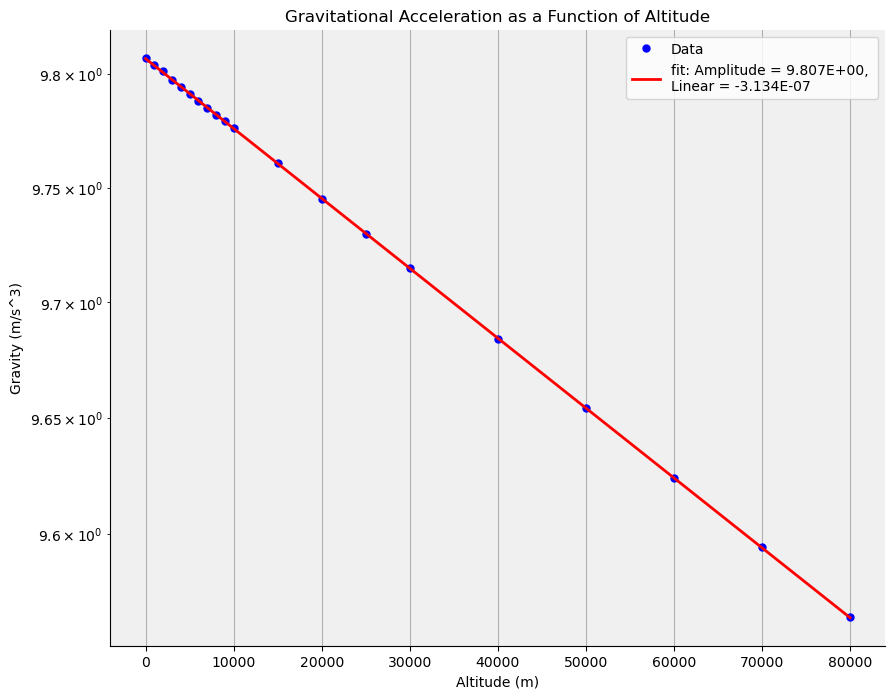

In [101]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E, \nQuadratic = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravitational Acceleration as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^3)")
plt.yscale("log")
plt.legend()

This is pretty much a perfect fit even in log scale it goes through all the points.

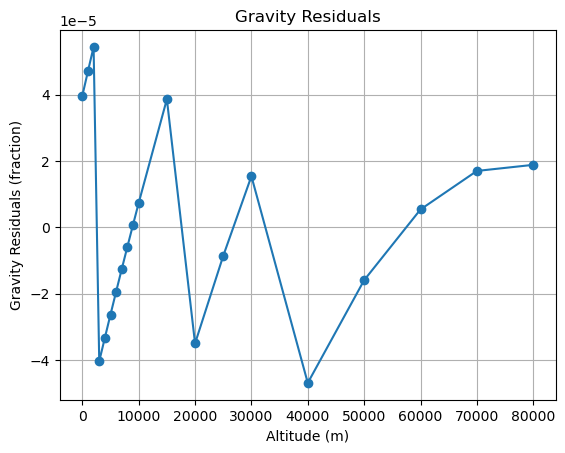

In [102]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt))/gravity, 'o-')

### \############################## Disclaimer \##############################

It doesn't really make sense to fit the residuals and then add that to the fit because they are pretty much just noise centered around zero. However, I am going to do it for the practice.

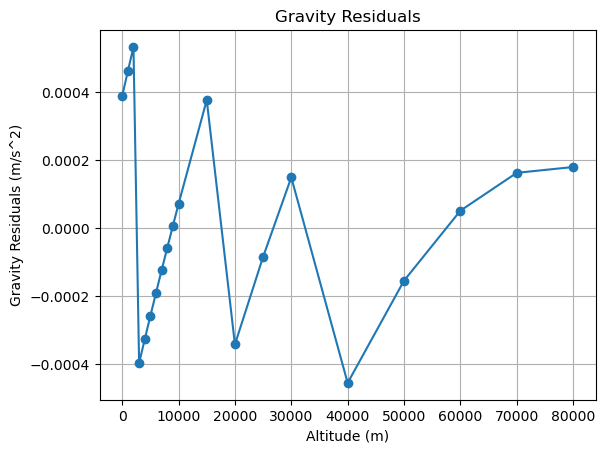

In [103]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

In [104]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h,i,j,k,l,m):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)+i*np.power(np.array(x),8)+j*np.power(np.array(x),9)+k*np.power(np.array(x),10)+l*np.power(np.array(x),11)+m*np.power(np.array(x),12)


In [105]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [106]:
print (popt, pcov)

[ 4.16246920e-04  3.13181735e-07 -3.33908805e-10  8.37521053e-14
 -9.69402282e-18  6.24431242e-22 -2.41867161e-26  5.75081145e-31
 -8.08407547e-36  5.61106238e-41  2.55630695e-48 -2.52626890e-51
  1.11267760e-56] [[ 9.62836204e-007 -1.36991021e-009  6.70686734e-013 -1.61167811e-016
   2.21483286e-020 -1.88917433e-024  1.04756711e-028 -3.86574256e-033
   9.53846415e-038 -1.54991253e-042  1.58714874e-047 -9.25976602e-053
   2.34135232e-058]
 [-1.36991021e-009  4.86369305e-012 -3.24672222e-015  9.19537887e-019
  -1.39976036e-022  1.27907008e-026 -7.44567468e-031  2.84649874e-035
  -7.21082815e-040  1.19527203e-044 -1.24285300e-049  7.33771793e-055
  -1.87272756e-060]
 [ 6.70686734e-013 -3.24672222e-015  2.38891247e-018 -7.14929827e-022
   1.12812187e-025 -1.05677455e-029  6.26197322e-034 -2.42539577e-038
   6.20431293e-043 -1.03608058e-047  1.08348444e-052 -6.42525476e-058
   1.64557378e-063]
 [-1.61167811e-016  9.19537887e-019 -7.14929827e-022  2.21434790e-025
  -3.57818400e-029  3.40940

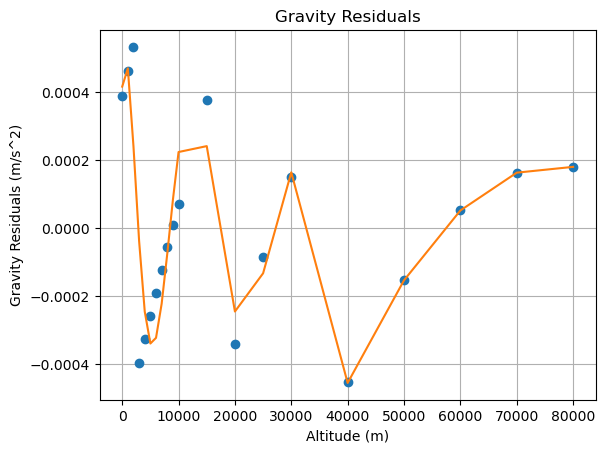

In [107]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [108]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8], popt[9], popt[10], popt[11], popt[12]]

In [109]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h,i,j,k,l,m):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)+i*np.power(np.array(x),8)+j*np.power(np.array(x),9)+k*np.power(np.array(x),10)+l*np.power(np.array(x),11)+m*np.power(np.array(x),12)

In [110]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [111]:
print (popt, pcov)

[ 9.80661109e+00 -3.13369232e-07  4.16246920e-04  3.13181735e-07
 -3.33908805e-10  8.37521053e-14 -9.69402282e-18  6.24431242e-22
 -2.41867161e-26  5.75081145e-31 -8.08407547e-36  5.61106238e-41
  2.55630695e-48 -2.52626890e-51  1.11267760e-56] [[ 1.85162993e+004 -2.13929406e-004 -1.85148898e+004  7.93757314e-003
  -3.57731525e-009 -1.14253106e-011  4.32800433e-015 -6.96896378e-019
   6.24440338e-023 -3.39439262e-027  1.15355202e-031 -2.44748419e-036
   3.13290395e-041 -2.20415248e-046  6.52367033e-052]
 [-2.13929406e-004  3.84986430e-008  2.13914690e-004 -3.77624932e-007
   1.09649071e-013  5.04826731e-018 -9.15461077e-022  8.80568176e-026
  -5.32024271e-030  2.13698010e-034 -5.73836734e-039  1.00748245e-043
  -1.10085521e-048  6.75457260e-054 -1.77112096e-059]
 [-1.85148898e+004  2.13914690e-004  1.85134805e+004 -7.93698558e-003
   3.57760675e-009  1.14243185e-011 -4.32765961e-015  6.96842149e-019
  -6.24392212e-023  3.39413225e-027 -1.15346376e-031  2.44729722e-036
  -3.13266484e-04

Chi^2 / dof = 3.153E-07 / 5


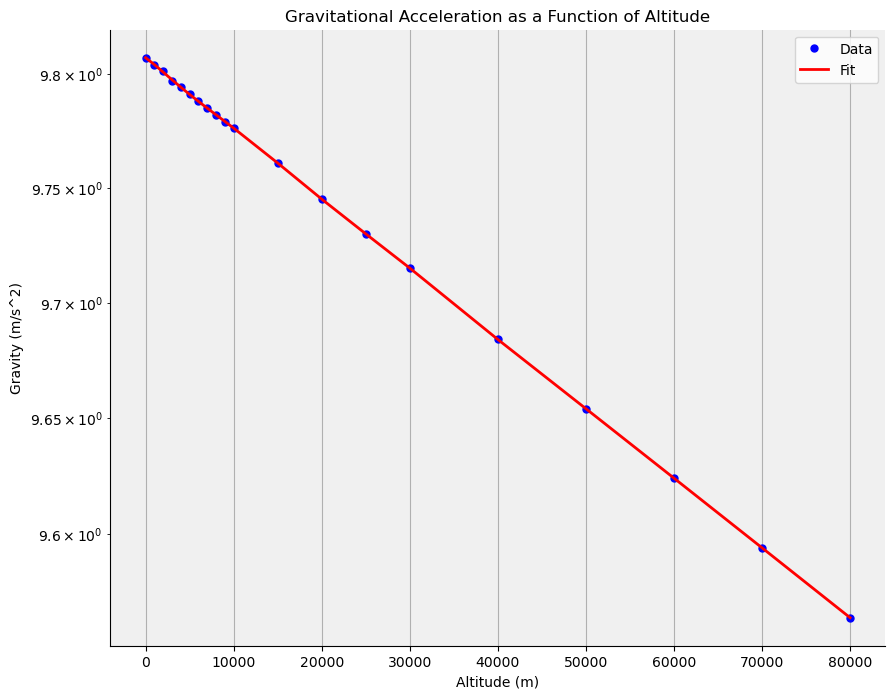

In [112]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Gravitational Acceleration as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.yscale("log")
plt.legend()